In [188]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

### We downloaded an excell file contains benjamin netanyahu speeches and content thay from ynet source:
https://z.ynet.co.il/long/content/specials/inhiswords/
- Afetr that, we converted it to a .csv file in order to work with the pandas library

In [189]:
# xlsx to csv conversion 
# def convert_xlsx_to_csv(xlsx_file, csv_file):
#     df = pd.read_excel(xlsx_file)
#     df.to_csv(csv_file, index=False)

# convert_xlsx_to_csv('netanyahu___data.xlsx', 'bibi_data.csv')

In [190]:
bibi_df = pd.read_csv('bibi_data.csv')
bibi_df.head()

,תאריך,סוג,טקסט
0,7.10.2023,הצהרה,"אזרחי ישראל, אנחנו במלחמה. לא במבצע, לא בסבבים..."
1,7.10.2023,פתיחת ישיבת קבינט,מהבוקר מדינת ישראל נמצאת במלחמה. היעד הראשון ש...
2,2023-07-10 00:00:00,ישיבת קבינט והצהרה לציבור,"התקבלו החלטות מבצעיות שמטרתן להביא ל""השמדת היכ..."
3,2023-08-10 00:00:00,ציוץ,"""אנחנו יוצאים למלחמה ארוכה וקשה. המלחמה נכפתה ..."
4,8.10.2023,ציוץ,"""בחמ״ל חיל האוויר. ישראל תנצח""."


In [191]:
# replace column titles with english names
bibi_df.columns = ['date','type','text']

In [192]:
# filter to keep only the rows with 'נאום' contained in the type column
filtered_bibi_df = bibi_df[bibi_df['type'].str.contains('נאום', case=False, na=False)]
filtered_bibi_df

,date,type,text
16,12.10.2023,נאום בכנסת,"אדוני היו""ר, חברות וחברי הכנסת, השרות והשרים, ..."
20,16.10.2023,נאום בכנסת,"""מכובדי נשיא המדינה, יו""ר הכנסת, המשנה לנשיא ב..."
139,25.12.2023,נאום בכנסת,"משפחות יקרות, \nאדוני היו""ר,\nשרות ושרי הממשלה..."
172,24.1.2024,נאום בכנסת,"מכובדי נשיא המדינה יצחק הרצוג, יו""ר הכנסת אמיר..."
178,30.1.2024,נאום בישיבת עלי,"תודה הרב סדן, אתה מנהיג גדול לעם ישראל, והישיב..."
247,9.4.2024,נאום למתגייסים,אתם ביום מאוד גורלי בחיים שלכם ובחיים של המדינ...
252,16.4.2024,נאום למתגייסים,"דיברתי עם כמה מכם, ראיתי את המוכנות, גם הפיזית..."
265,2.5.2024,"נאום אצ""ל","אנחנו מתכנסים כאן, לא רק כדי להזכיר נשכחות מן ..."
274,5.5.2024,נאום ערב יום השואה,"מכובדי נשיא המדינה ורעייתו,\nאעשה כמצוותך, ואו..."
276,6.5.2024,נאום יום השואה בכנסת,"אמרתי אמש בטקס הזיכרון ביד ושם, שהכוונה של המר..."


In [193]:
# remove '\n' from the text column
filtered_bibi_df.loc[:, 'text'] = filtered_bibi_df['text'].str.replace('\n', ' ', regex=False)
filtered_bibi_df['text']

16     אדוני היו"ר, חברות וחברי הכנסת, השרות והשרים, ...
20     "מכובדי נשיא המדינה, יו"ר הכנסת, המשנה לנשיא ב...
139    משפחות יקרות,  אדוני היו"ר, שרות ושרי הממשלה, ...
172    מכובדי נשיא המדינה יצחק הרצוג, יו"ר הכנסת אמיר...
178    תודה הרב סדן, אתה מנהיג גדול לעם ישראל, והישיב...
247    אתם ביום מאוד גורלי בחיים שלכם ובחיים של המדינ...
252    דיברתי עם כמה מכם, ראיתי את המוכנות, גם הפיזית...
265    אנחנו מתכנסים כאן, לא רק כדי להזכיר נשכחות מן ...
274    מכובדי נשיא המדינה ורעייתו, אעשה כמצוותך, ואומ...
276    אמרתי אמש בטקס הזיכרון ביד ושם, שהכוונה של המר...
285    מכובדי נשיא המדינה, יצחק הרצוג ורעייתו; יושב-ר...
286    מכובדי נשיא המדינה, יצחק הרצוג, אעשה כמצוותך ו...
304    אדוני היו"ר, חברי הכנסת, לפני כמה ימים הייתי ב...
314    מכובדי הנשיא יצחק הרצוג ורעייתו מיכל, יושב-ראש...
334    החשיבות של המעמד הזה בכל שנה נשמרת, אבל השנה ה...
341    אדוני היו"ר, חברות וחברי הכנסת,  "תרימו את הרא...
361    שר הביטחון, יואב גלנט; הרמטכ"ל, רב-אלוף הרצי ה...
366    אחי ואחיותיי למשפחת השכו

In [194]:
def load_heb_stopwords():
    # Load Hebrew stopwords from a file
    with open('heb_stopwords.txt', 'r', encoding='utf-8') as f:
        hebrew_stopwords = f.read().splitlines()
    return hebrew_stopwords

In [195]:
# heb_stopwords = [
#     'של', 'על', 'עם', 'זה', 'לא', 'מה', 'כל', 'את', 'גם', 'אבל',
#     'אם', 'הוא', 'היא', 'הם', 'הן', 'אני', 'אנחנו', 'אתה', 'אתם', 'אתן',
#     'כי', 'אז', 'או', 'יש', 'אין', 'כן', 'כמו', 'יותר', 'פחות', 'כאן',
#     'שם', 'מי', 'איך', 'מתי', 'למה', 'איפה', 'איזה', 'כך', 'ככה', 'גם כן',
#     'אחר', 'אחרי', 'לפני', 'בזמן', 'בין', 'תוך', 'עד', 'כדי', 'כאשר', 'ש',
#     'שאם', 'שלא', 'שכן', 'שאין', 'שאינו', 'שהוא', 'שהיא', 'שזה', 'שאתה', 'שאני',
#     'שיש', 'שגם', 'שהם', 'שהן', 'שהיו', 'שהיה', 'שהייתה', 'הזה', 'הזאת', 'האלה',
#     'זאת', 'אלה', 'היום', 'מכל', 'לכל', 'בלי', 'לעולם', 'אולי', 'רק', 'כמעט',
#     'תמיד', 'כבר', 'עוד', 'באמת', 'בעצם', 'לכן', 'אך', 'גם אם', 'בעוד', 'לפחות',
#     'בכלל', 'ואילו', 'ולכן', 'ואז', 'כפי', 'לפי', 'בהם', 'בהן', 'בם', 'בן', 'אומר', 'אותם'
# ]

In [196]:
def get_tfidf_scores_by_year(df, year, stopwords=None):
    # Filter rows by year
    df.loc[:, 'date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
    filtered_df = df.loc[df['date'].notna()] 

    if filtered_df.empty:
        print(f"No speeches found for year {year}.")
        return {}

    # Fit TF-IDF
    vectorizer = TfidfVectorizer(stop_words=stopwords)
    X = vectorizer.fit_transform(filtered_df['text'])

    # Extract words and their TF-IDF scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1

    tfidf_df = pd.DataFrame({
        'word': feature_names,
        'tfidf': tfidf_scores
    }).sort_values(by='tfidf', ascending=False)

    return dict(zip(tfidf_df['word'], tfidf_df['tfidf']))

In [197]:
def reverse_hebrew_words(word_list):
    return {word[::-1]: score for word, score in word_list.items()}

In [198]:
import matplotlib.pyplot as plt
def plot_wordcloud_from_scores(word_scores, year=None, font_path='Rubik-Regular.ttf'):
    if not word_scores:
        print("No words to display.")
        return

    # Reverse Hebrew words for proper RTL display
    reverse_scores = {word[::-1]: score for word, score in word_scores.items()}

    wordcloud = WordCloud(
        font_path=font_path,
        width=1000,
        height=500,
    ).generate_from_frequencies(reverse_scores)

    # Plot
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"TF-IDF Word Cloud – {year}", fontsize=22)
    plt.show()

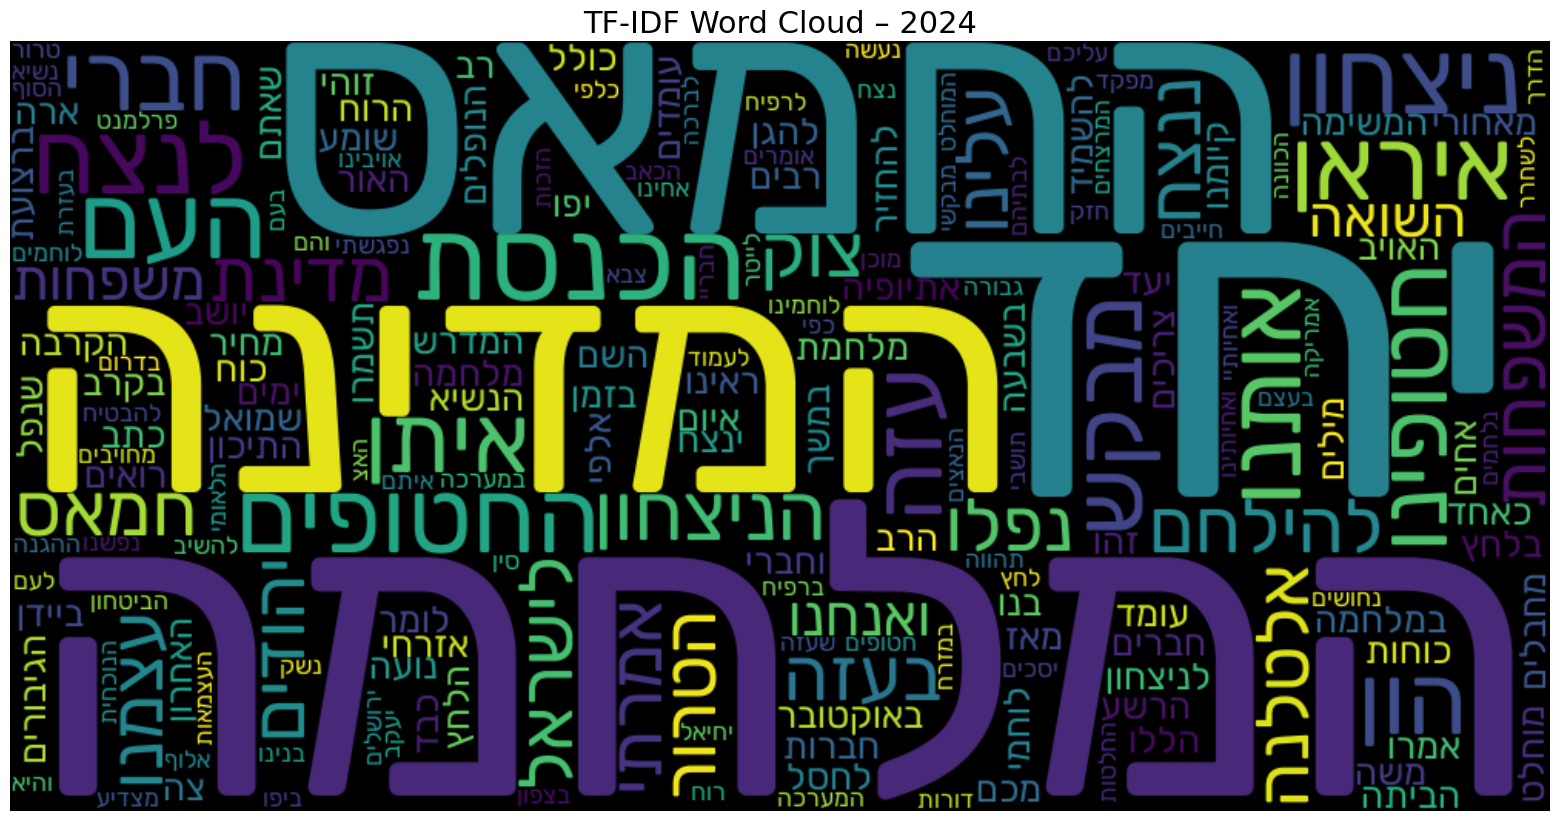

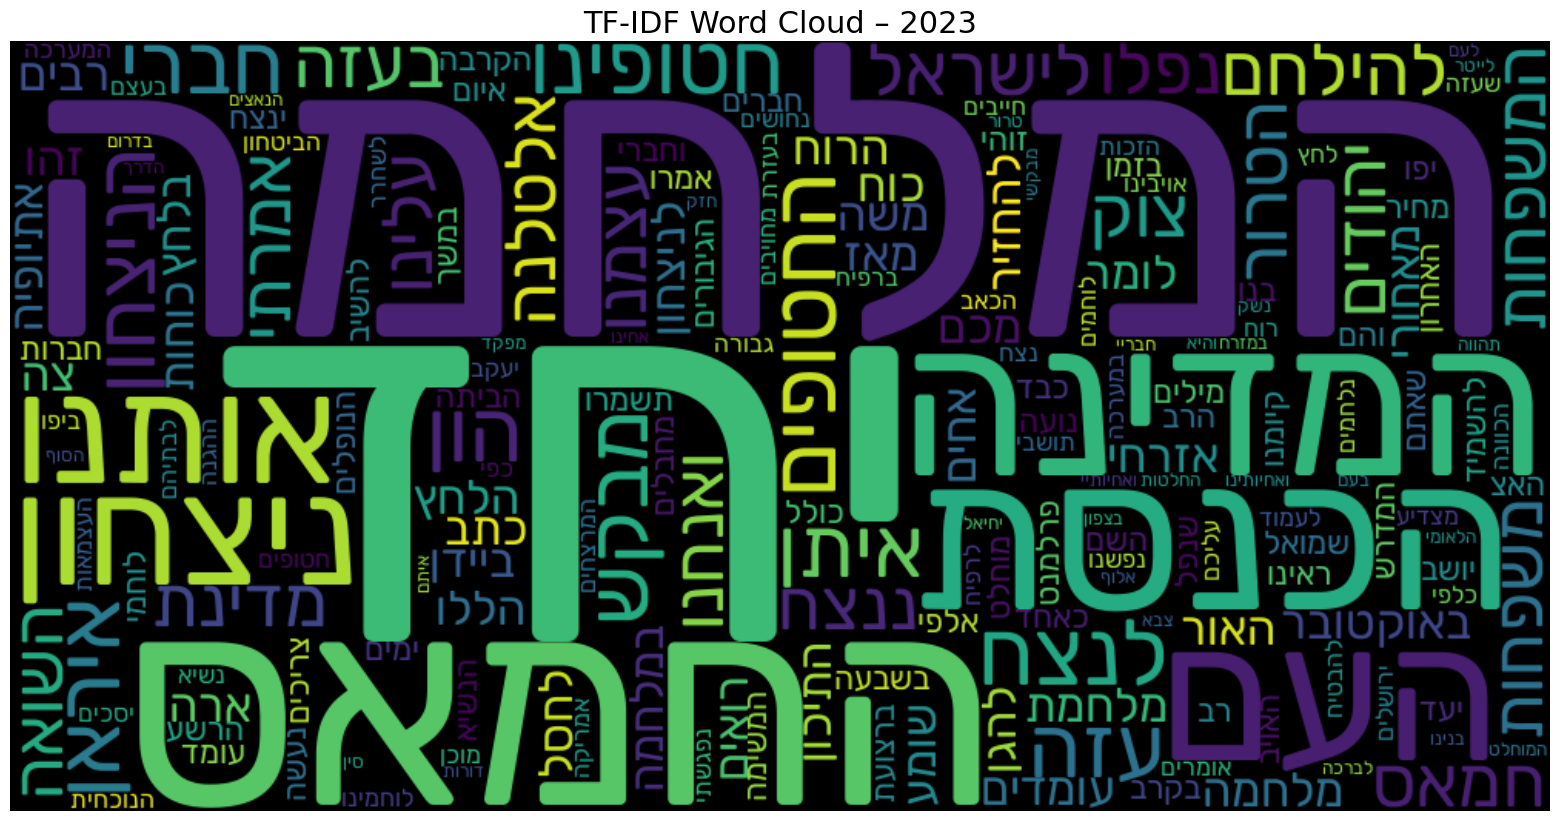

In [200]:
heb_stopwords = load_heb_stopwords()
year1 = 2024
tf_idf_scores = get_tfidf_scores_by_year(filtered_bibi_df, year1, stopwords=heb_stopwords)
plot_wordcloud_from_scores(tf_idf_scores, year=year1)
year2 = 2023
tf_idf_scores = get_tfidf_scores_by_year(filtered_bibi_df, year2, stopwords=heb_stopwords)
plot_wordcloud_from_scores(tf_idf_scores, year=year2)